### Load ski resort data

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ema_workbench import load_results, ema_logging

In [201]:
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\setup1\Results_3'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\setup1\Results_3'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\setup1\Results_3'


fh = os.path.join(root, '9000_runs.tar.gz')
experiments, outcomes = load_results(fh)

In [202]:
experiments.head()

,X2fM,X3iPot,X5temp,X6tempArt,Xfactor1,xClimateModel,xRCP,x1SnowThershold,xGoodDays,scenario,policy,model
0,1.326935,957.312700,4.532665,-1.247101,0.935556,0.850193,3.0,250.0,100.0,0,0,UZHModel
1,1.564115,1052.845098,5.474877,-1.803193,2.755444,0.536630,3.0,250.0,100.0,1,0,UZHModel
2,1.160213,909.670187,5.520439,-1.333493,2.649474,0.720566,3.0,250.0,100.0,2,0,UZHModel
3,1.295246,996.188724,5.758656,-1.138981,1.560372,0.013137,2.0,250.0,100.0,3,0,UZHModel
4,1.045140,1054.748859,5.265179,-1.532905,2.184067,0.321757,2.0,250.0,100.0,4,0,UZHModel


In [203]:
outcomes.keys()

dict_keys(['S_Ave_GoodDay', 'GCM_RCM', 'S_GoodDay', 'S_Ave_ArtSnow', 'S_Ave_Financial', 'S_Ave_Likelihood', 'tipping_points'])

In [204]:
type(outcomes)

dict

In [205]:
S_GoodDay = outcomes['S_GoodDay']
#Each row is an experiment containing a timeseries with good snow days in that year
df = pd.DataFrame(S_GoodDay)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,174.08084,146.14476,141.52732,129.27784,164.66968,171.78616,152.80860,98.40772,159.65676,163.95908,...,86.44012,98.15580,104.84660,130.05032,117.02572,60.58184,76.38956,100.44380,98.85812,116.88928
1,172.82076,181.00000,168.52000,166.50736,159.79796,177.93936,154.30196,104.79512,173.26764,158.27660,...,80.24476,100.35204,88.12420,93.76524,89.15248,51.91280,51.10992,58.56948,111.06224,100.78756
2,101.22120,170.40644,178.22572,154.47336,148.04180,127.32504,170.21008,154.69128,170.11844,130.78580,...,126.57752,54.38268,81.55444,77.52804,101.91180,78.00200,102.11712,103.70456,114.19820,72.55712
3,135.26744,143.47008,181.77520,144.18160,146.47940,132.46120,156.96344,167.07412,117.98468,173.84624,...,109.02196,110.42144,81.25840,79.16852,131.15084,142.09532,104.97912,85.96856,99.12412,104.73728
4,171.79800,164.62028,182.00000,141.21448,126.80332,150.14164,130.97340,147.67428,139.80140,180.88652,...,143.14744,117.18868,72.65852,93.94948,103.13188,115.93944,111.06328,142.63504,96.60152,150.84508


In [206]:
#Rolling windows, length 10
#Taking the mean of the window
wd = df.rolling(window=10,center=True,axis=1).mean()
wd.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,NaN,NaN,NaN,NaN,NaN,150.231876,147.661824,146.085876,146.791152,147.970716,...,96.046168,90.592908,94.740416,96.365612,99.517880,98.968116,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,161.722676,157.693268,155.604992,152.626988,152.801648,...,87.253920,82.261788,77.993096,78.325564,79.447608,82.508072,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,150.549916,157.774652,155.293084,154.621164,157.242796,...,90.914748,89.631228,90.669512,90.469724,89.701896,91.253348,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,149.950340,153.528344,155.173516,154.274720,150.203152,...,103.175496,108.958968,107.405224,103.441640,103.170908,104.792556,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,153.591332,150.015628,148.611324,147.637916,149.210532,...,114.824984,112.233356,111.341420,113.766560,113.214820,114.716036,NaN,NaN,NaN,NaN


In [207]:
wd.shape

(9000, 118)

In [208]:
np.array(wd.iloc[1,5])

array(161.722676)

So, I smoothed the signal of each experiment a little bit.
I am now interested in the question: which factors explain the number of good snowdays in a couple of reference years?

The reference years are: 10 (beginning of the timeseries), 110 (end of the timeseries) and 60 (half of the timeseries).

In [209]:
outcomes2 = outcomes.copy()
outcomes2['GD_10'] = np.array(wd.iloc[:,10])
outcomes2['GD_60'] = np.array(wd.iloc[:,60])
outcomes2['GD_110'] = np.array(wd.iloc[:,110])

In [210]:
len(outcomes2['GD_10'])

9000

In [211]:
outcomes2.keys()

dict_keys(['S_Ave_GoodDay', 'GCM_RCM', 'S_GoodDay', 'S_Ave_ArtSnow', 'S_Ave_Financial', 'S_Ave_Likelihood', 'tipping_points', 'GD_10', 'GD_60', 'GD_110'])

In [212]:
experiments2 = experiments
experiments2 = experiments2.pop('policy')

In [213]:
sns.set(font_scale=1.5)

### Feature scoring

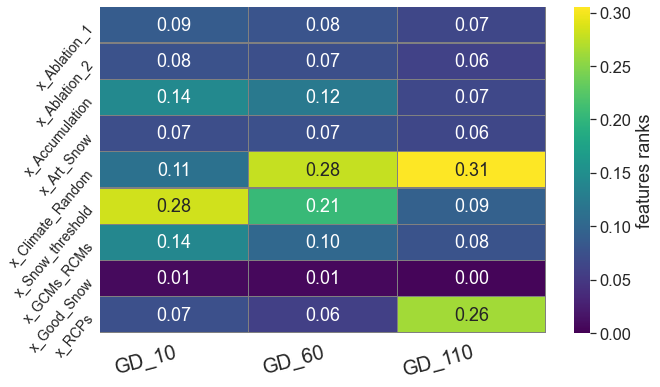

In [214]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns


fig, ax = plt.subplots(figsize=(10,6))

x = experiments
plot = ['GD_10','GD_60','GD_110']
y = {x: outcomes2[x] for x in plot}

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', fmt=".2f", annot=True,
            vmin=0, linewidths=0.28, 
            linecolor="grey",
            cbar_kws={'label': 'features ranks'})


plt.setp(ax.get_xticklabels(), rotation=15, size = 20, ha="right",
         rotation_mode="anchor")

ylabels = ['x_Ablation_1', 'x_Ablation_2', 'x_Accumulation', 'x_Art_Snow', 'x_Climate_Random', 'x_Snow_threshold', 'x_GCMs_RCMs', 'x_Good_Snow', 'x_RCPs']
ax.set_yticklabels(ylabels)
plt.setp(ax.get_yticklabels(), rotation=50, size = 14, ha="right", rotation_mode="anchor")


fig.savefig(os.path.join(root, 'Time_outputs1.tiff'), format='tiff', dpi=300)
fig.savefig(os.path.join(root, 'Time_outputs2.tiff'), format='tiff', dpi=150)

plt.show()

So that is a pretty cool result! You see that over time, the xRCP (i.e. the climate scenario) starts to strongly dominate the uncertainty of the results!

### Dimension stacking

c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\matplotlib\colors.py:587: RuntimeWarning: invalid value encountered in greater
  xa[xa > self.N - 1] = self._i_over
c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\matplotlib\colors.py:588: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = self._i_under


IndexError: arrays used as indices must be of integer (or boolean) type

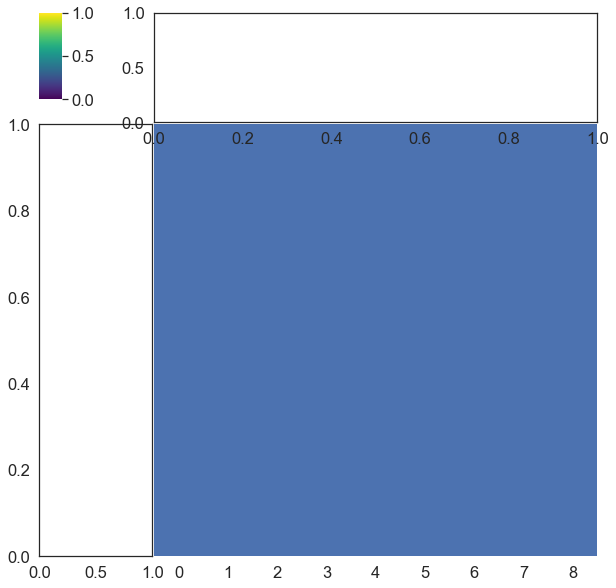

In [215]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes2['GD_10'] < 100
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

How to interpret this?

c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\matplotlib\colors.py:587: RuntimeWarning: invalid value encountered in greater
  xa[xa > self.N - 1] = self._i_over
c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\matplotlib\colors.py:588: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = self._i_under


IndexError: arrays used as indices must be of integer (or boolean) type

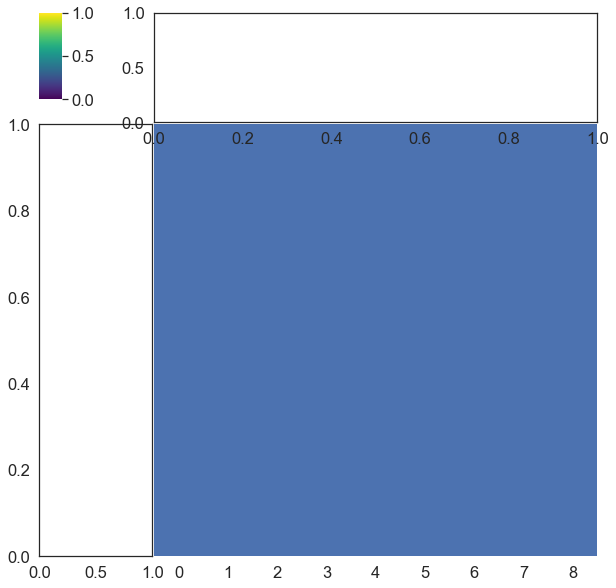

In [216]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes2['GD_60'] < 70
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()